In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [59]:
heart_data = pd.read_csv('heart_disease.csv')
heart_data.head()


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [60]:
heart_data.tail()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [61]:
heart_data.shape

(303, 14)

In [62]:
heart_data.size

4242

In [63]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [64]:
heart_data.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [65]:
thal_avg = heart_data["thal"].astype("float").mean(axis=0)
print("Average values of thal:", thal_avg)

heart_data["thal"].replace(np.nan, thal_avg, inplace = True)


Average values of thal: 4.73421926910299


In [66]:
ca_avg = heart_data["ca"].astype("float").mean(axis=0)
print("Average values of ca:", ca_avg)

heart_data["ca"].replace(np.nan, ca_avg, inplace = True)

Average values of ca: 0.6722408026755853


In [67]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               303 non-null    float64
 12  thal             303 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [68]:
heart_data.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [69]:
heart_data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<function matplotlib.pyplot.show(close=None, block=None)>

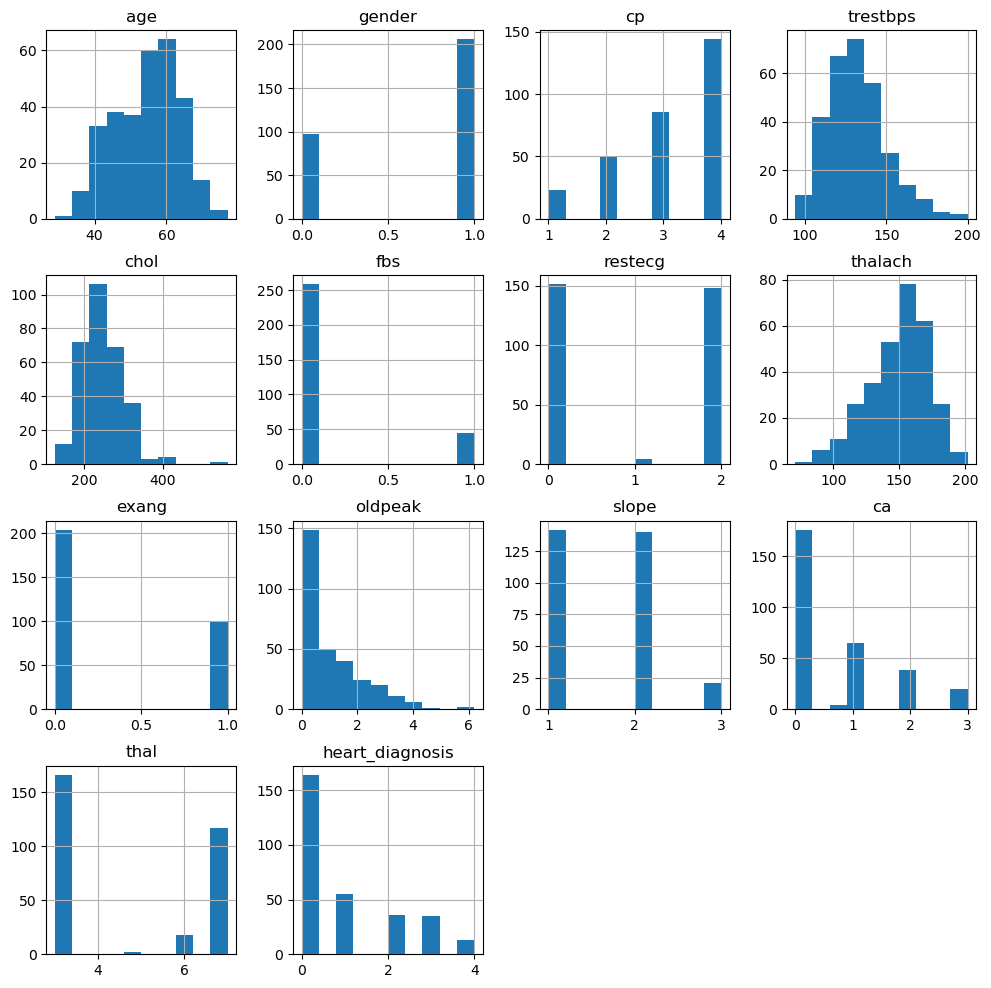

In [70]:
heart_data.hist(figsize =(12, 12))
plt.show

Converting Presence of Heart Disease as per problem statement (1,2,3,4 as 1)
to convert multiple values to binary set of values

In [71]:
heart_data["heart_diagnosis"]=heart_data["heart_diagnosis"].replace([1, 2, 3,4], 1)

In [72]:
heart_data["heart_diagnosis"]

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: heart_diagnosis, Length: 303, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

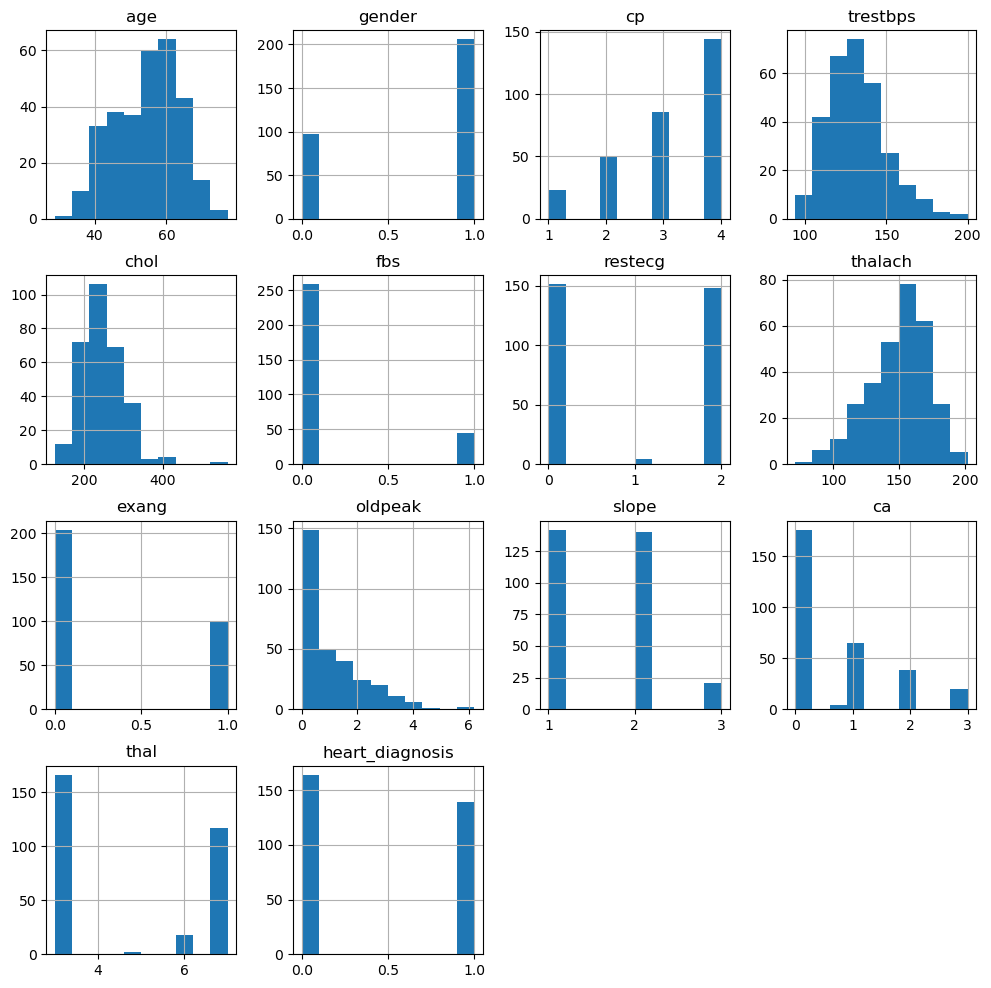

In [73]:
heart_data.hist(figsize =(12, 12))
plt.show

EDA

Presence of Heart Disease based on age

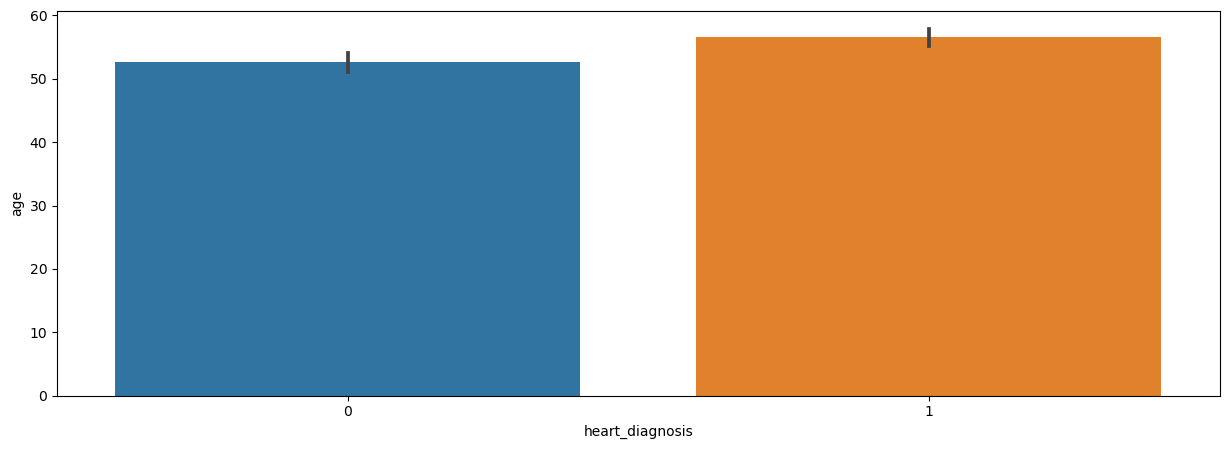

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='age',data=heart_data)
plt.show()

Based on Resting Heart Rate

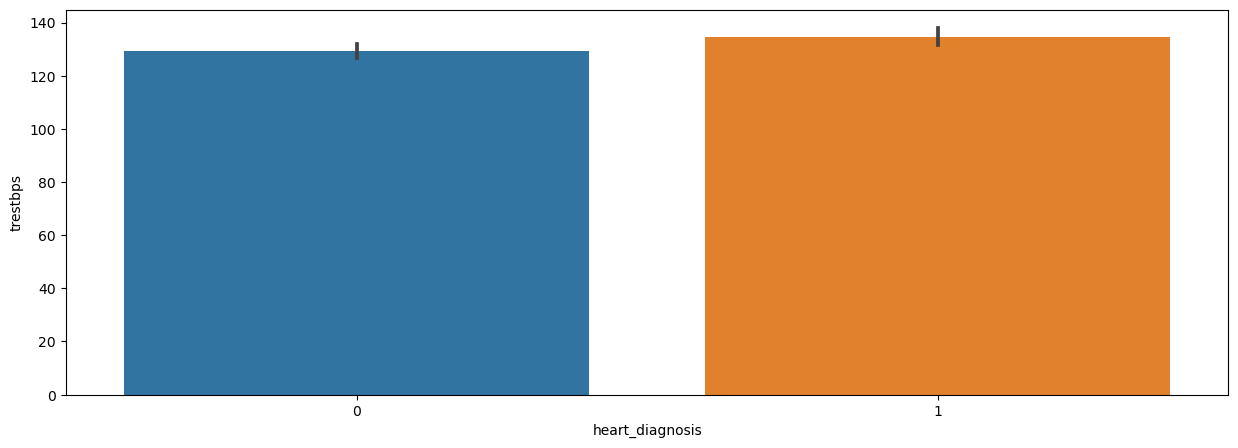

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='trestbps',data=heart_data)
plt.show()

Based on Blood Cholesterol

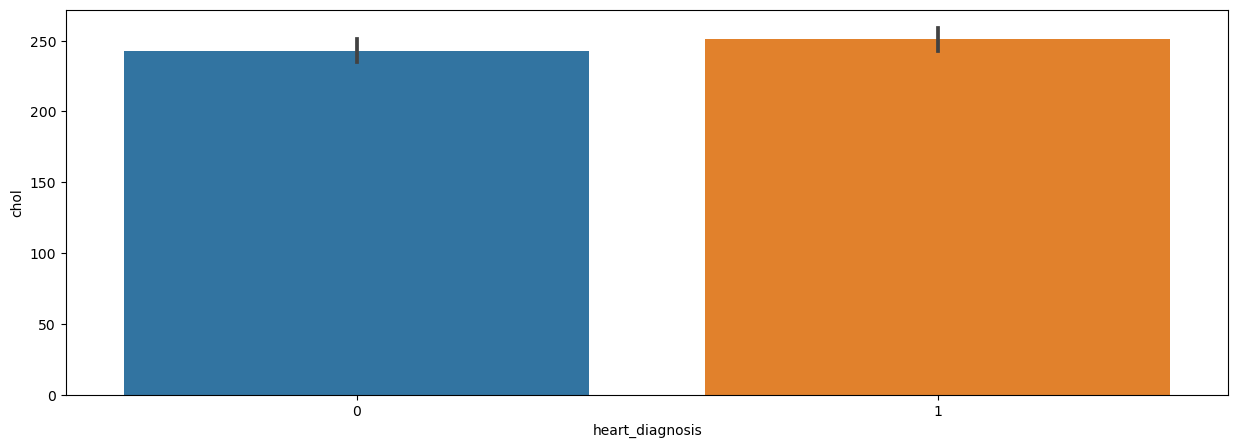

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='chol',data=heart_data)
plt.show()

Based on fasting blood sugar

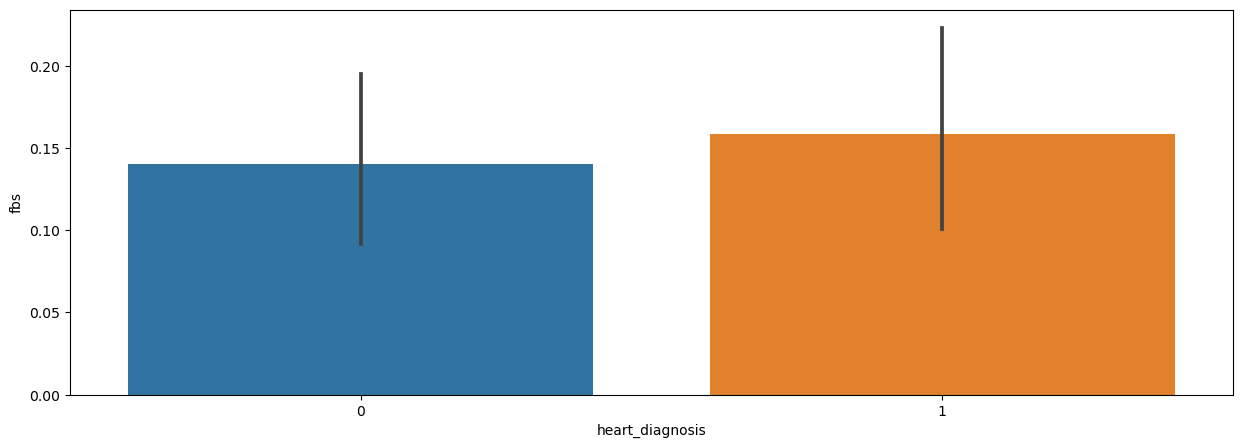

In [77]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='fbs',data=heart_data)
plt.show()

Based on Resting electrocardiographic results

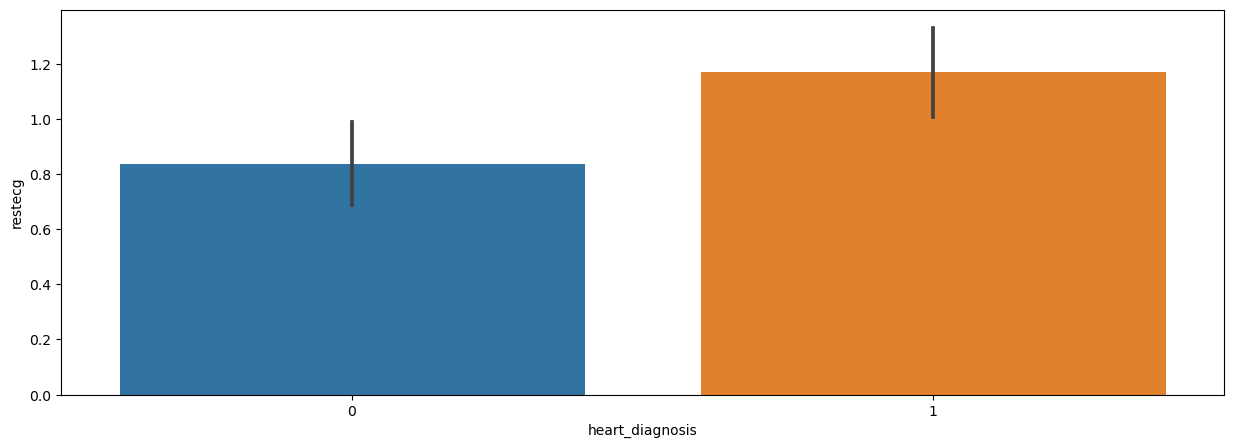

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='restecg',data=heart_data)
plt.show()

Based on Maximum heart rate achieved

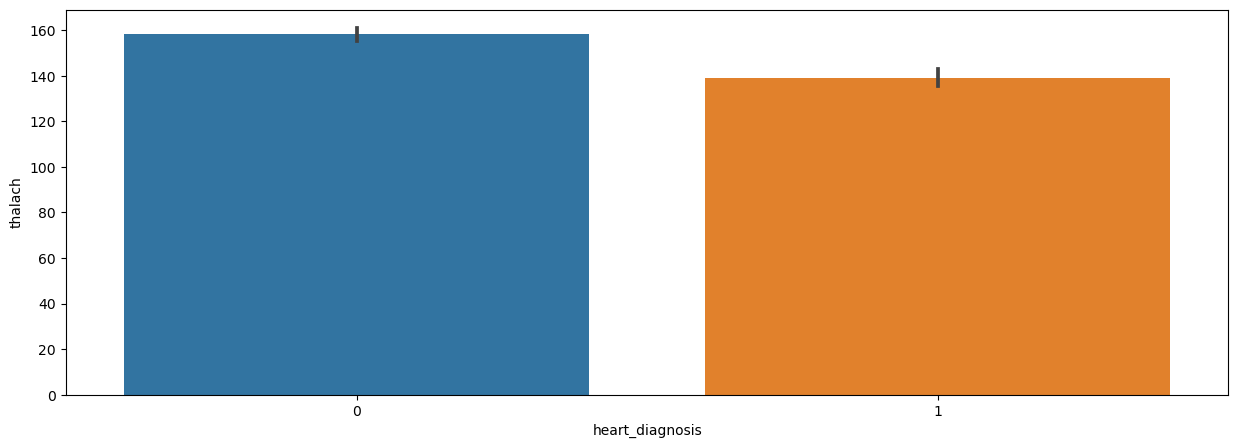

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='thalach',data=heart_data)
plt.show()

Based on Chest pain type

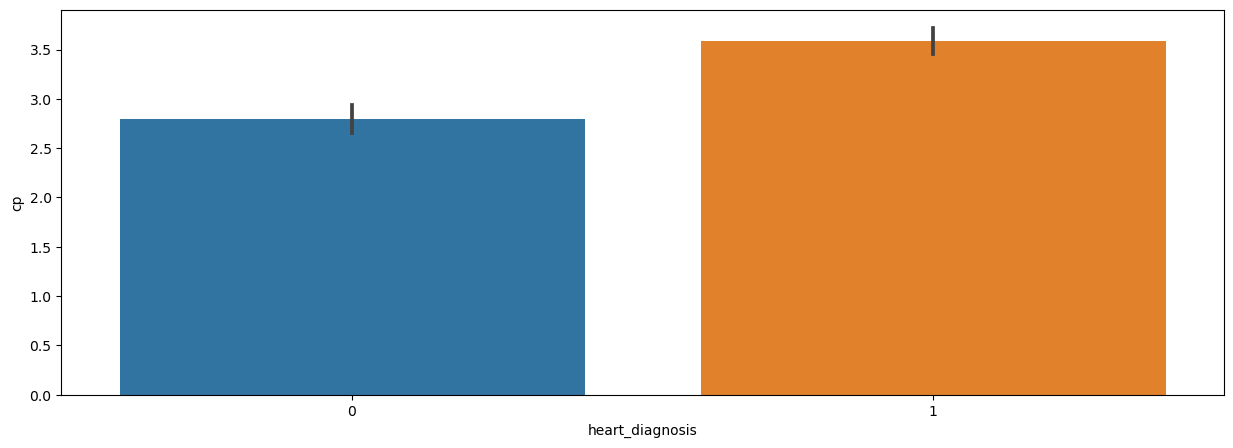

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='cp',data=heart_data)
plt.show()

Based on ST depression induced by exercise relative to rest

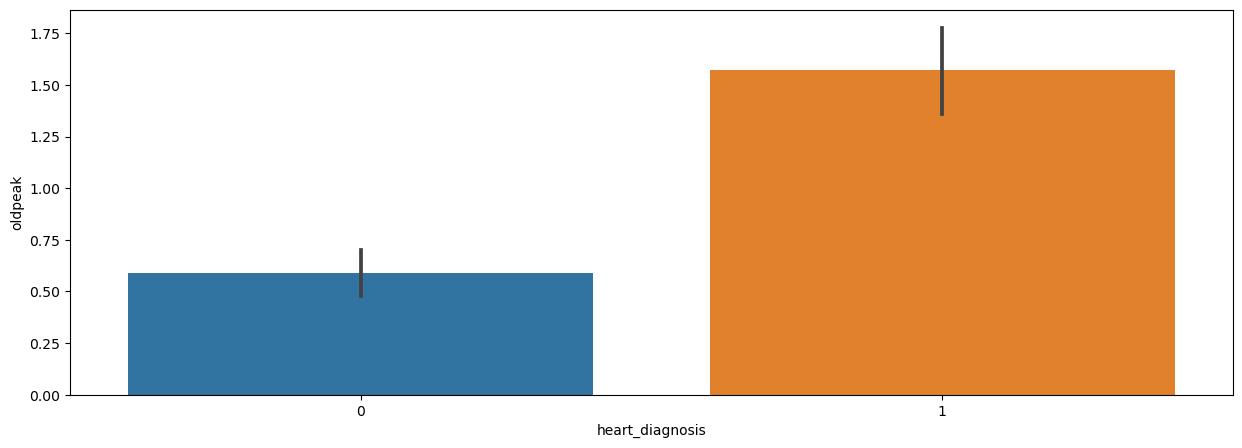

In [81]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='oldpeak',data=heart_data)
plt.show()

Based on slope of the peak exercise

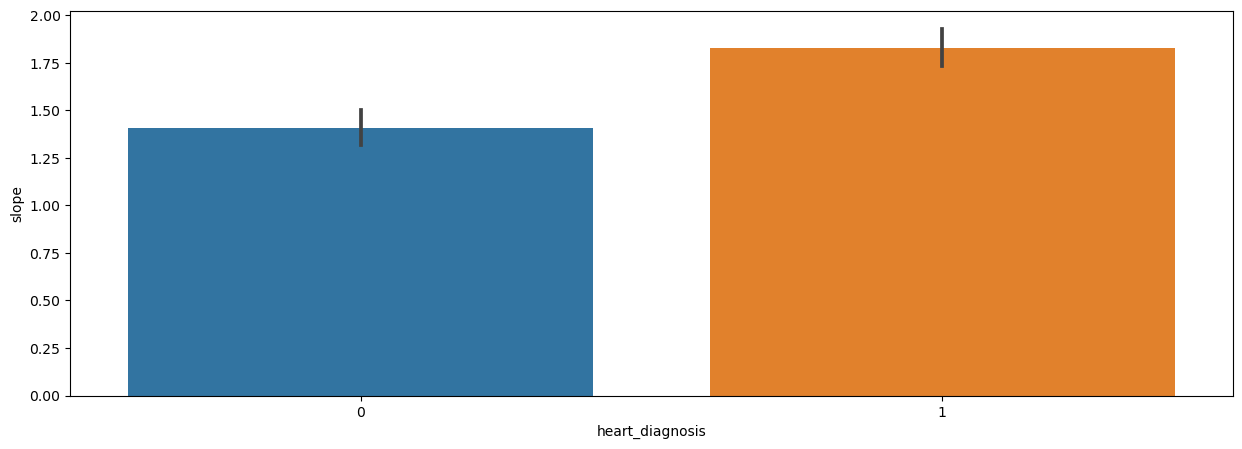

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='slope',data=heart_data)
plt.show()

Based on Number of major vessels 

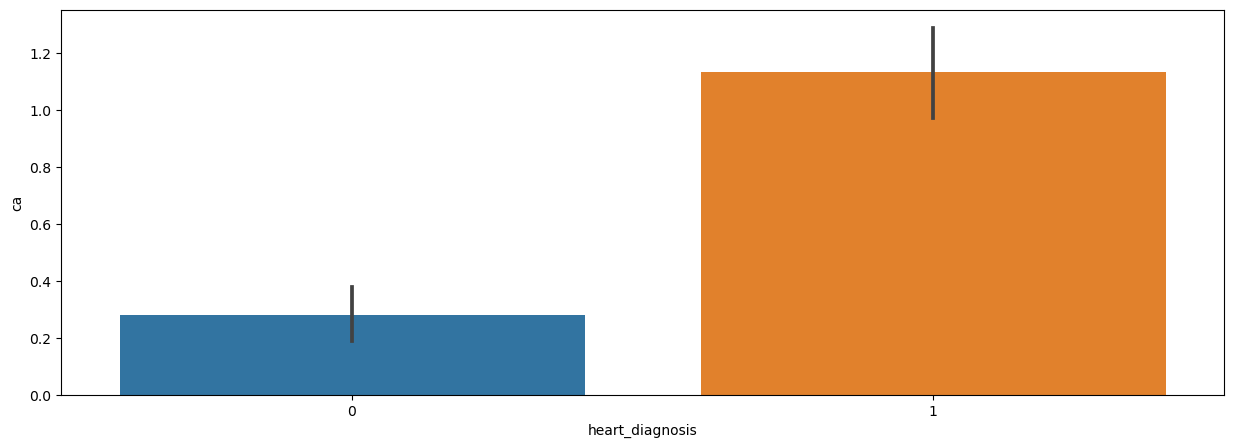

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='ca',data=heart_data)
plt.show()

Cases with Irreversible or reversible effect

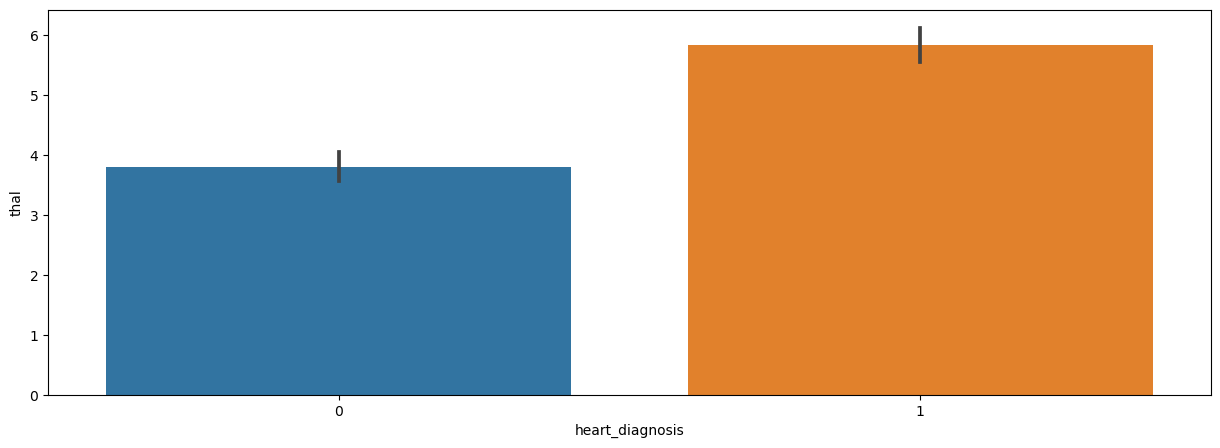

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='thal',data=heart_data)
plt.show()

Exercise induced Angina

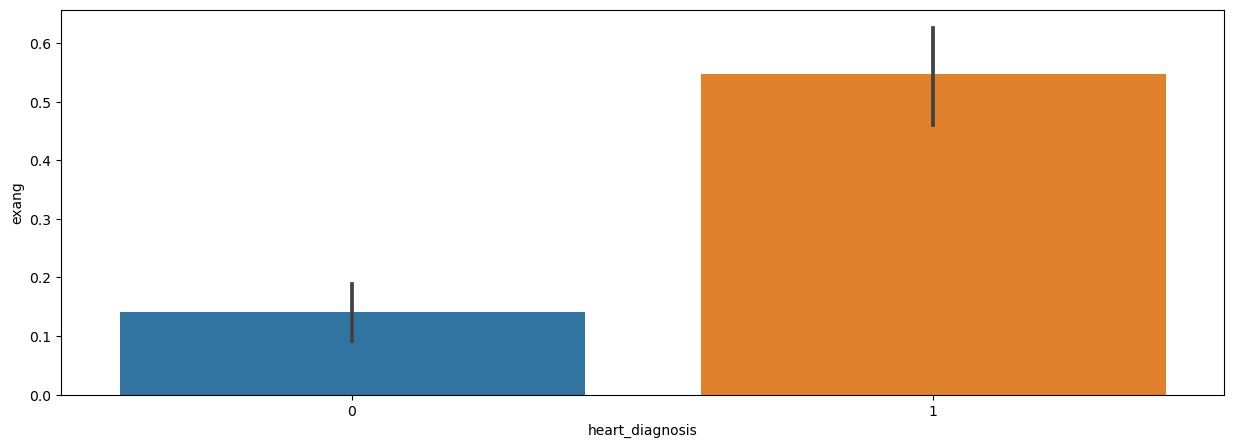

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x='heart_diagnosis',y='exang',data=heart_data)
plt.show()

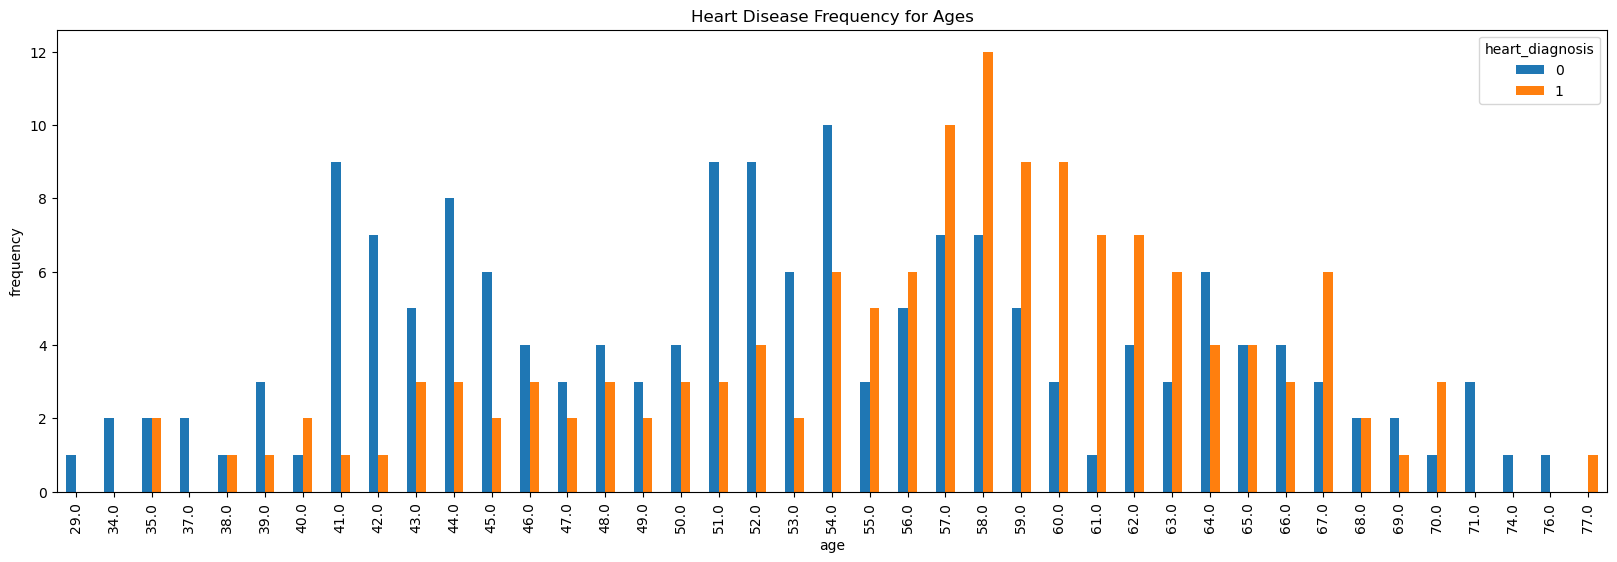

In [86]:
pd.crosstab(heart_data.age, heart_data.heart_diagnosis).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

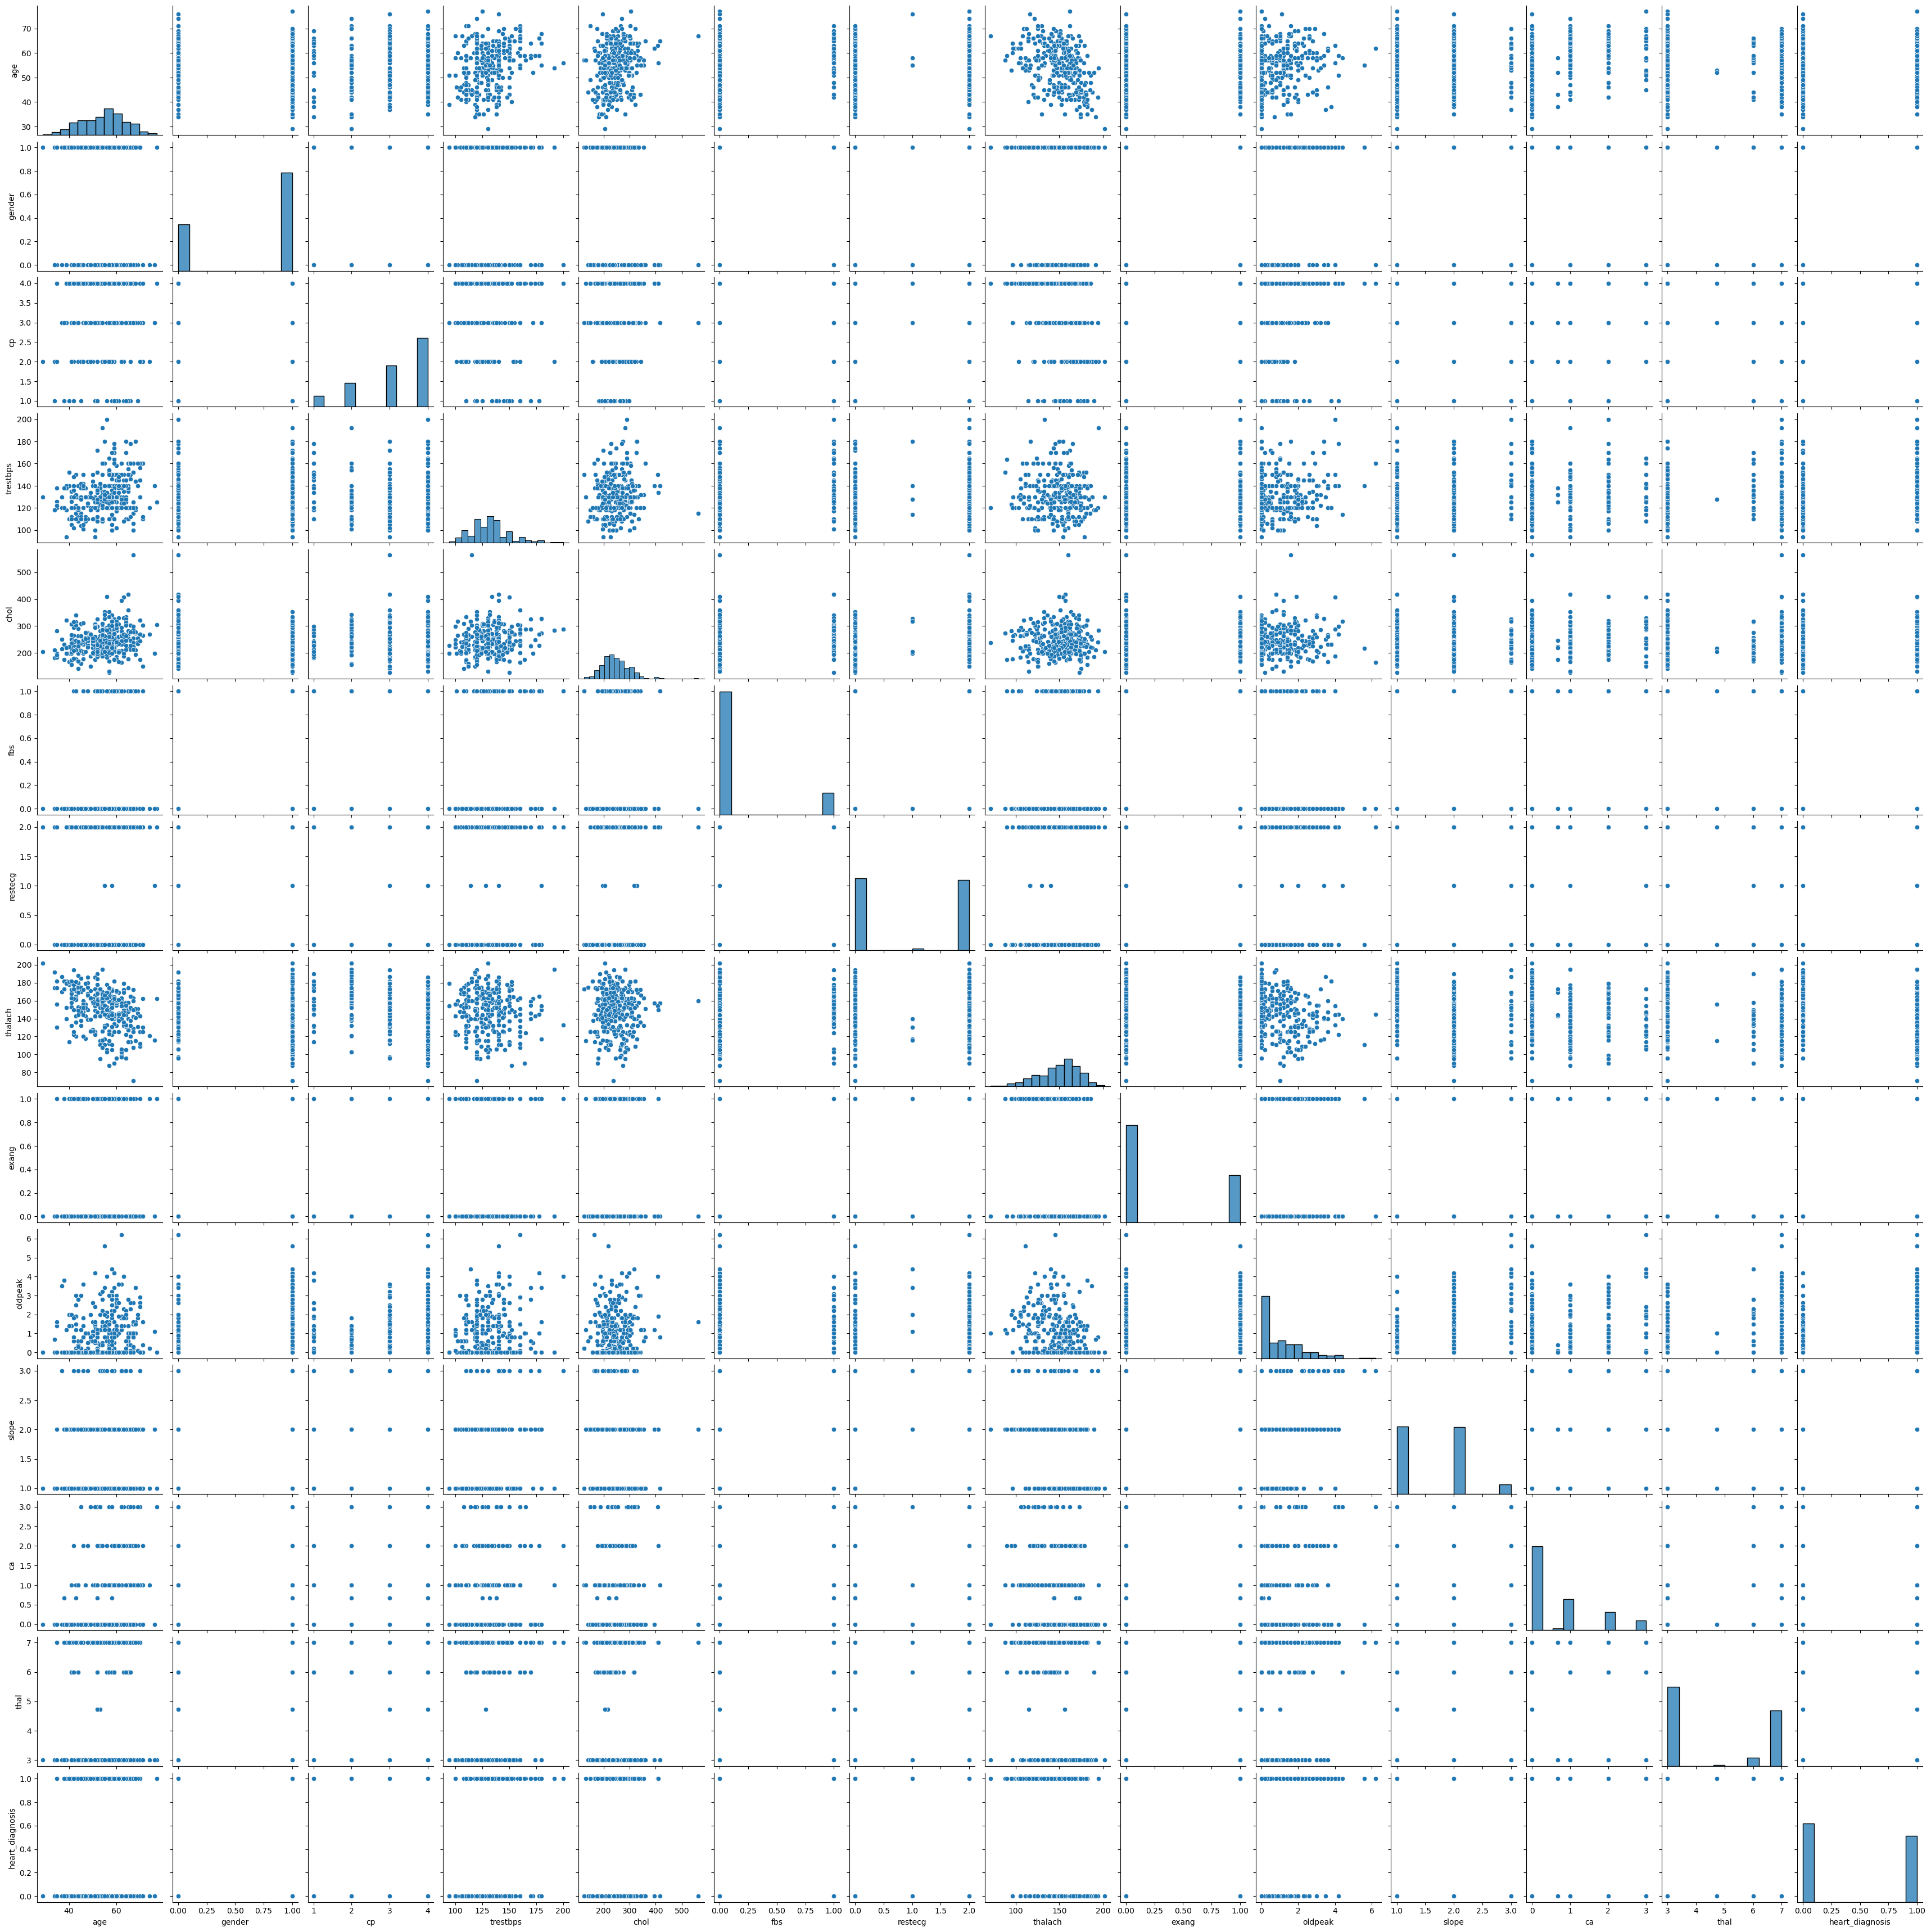

In [87]:
sns.pairplot(heart_data)

In [88]:
heart_data.corr()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.223120
gender,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.424510


<Axes: >

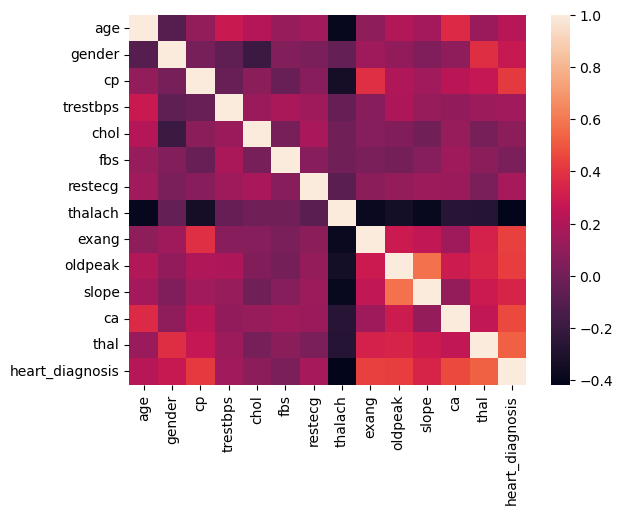

In [89]:
sns.heatmap(heart_data.corr())

In [90]:
heart_data['heart_diagnosis'].value_counts()

0    164
1    139
Name: heart_diagnosis, dtype: int64

<Axes: >

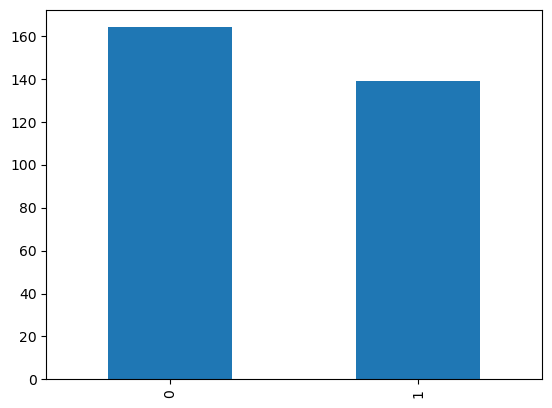

In [91]:
heart_data["heart_diagnosis"].value_counts().plot(kind="bar")

Splitting to Test and train and Logistic Regression

In [92]:
x=heart_data[['age','exang','cp',"trestbps","chol"]]
x=sm.add_constant(x)
y= heart_data[['heart_diagnosis']]
x_tr, x_te, y_tr, y_te = train_test_split(x,y, random_state=0)

In [93]:
model=sm.Logit(y,x)

In [94]:
res=model.fit()

Optimization terminated successfully.
         Current function value: 0.524209
         Iterations 6


In [95]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:        heart_diagnosis   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.2400
Time:                        19:12:53   Log-Likelihood:                -158.84
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.544e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7539      1.486     -5.217      0.000     -10.667      -4.841
age            0.0404      0.016      2.474      0.013       0.008       0.072
exang          1.5431      0.313      4.934      0.0

Feature Importance

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



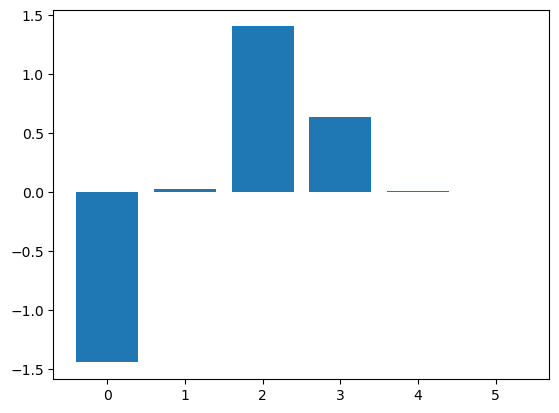

In [153]:
model = LogisticRegression()

model.fit(x, y)


importance = model.coef_[0]

plt.bar([x for x in range(len(importance))], importance)
plt.show()
    


Prediction

In [97]:
y_hat=(res.predict(x)>=0.5).astype(int)

In [98]:
y_hat

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    1
300    1
301    0
302    0
Length: 303, dtype: int32

In [99]:
confusion_matrix=res.pred_table(threshold=0.5)
confusion_matrix

array([[130.,  34.],
       [ 41.,  98.]])

In [100]:
accuracy=(confusion_matrix[0,0]+ confusion_matrix[1,1])/len(y_hat)
print("Accuracy of data = ", accuracy*100,"%")

Accuracy of data =  75.24752475247524 %


In [102]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [154]:
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_tr, y_tr)



In [155]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

2023-09-10 20:40:30,661 - WARNING  - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


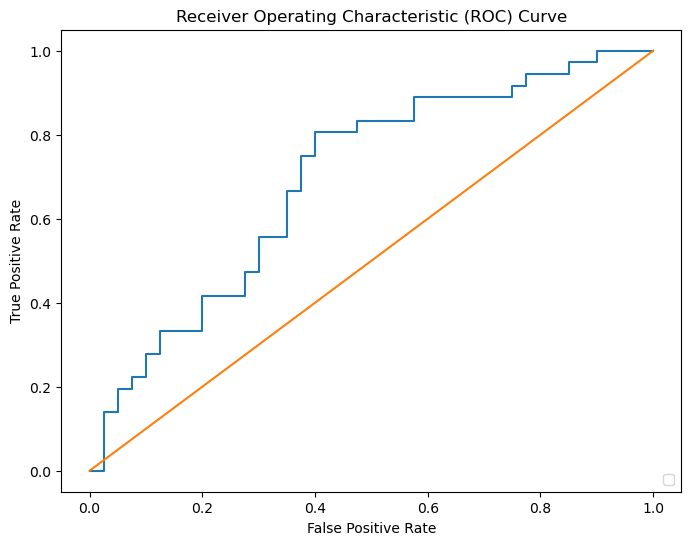

0.69375


In [156]:
fpr, tpr, thresholds = roc_curve(y_te, y_pr)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print(roc_auc)

In [157]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(x_tr, y_tr)



2023-09-10 20:40:31,920 - WARNING  - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


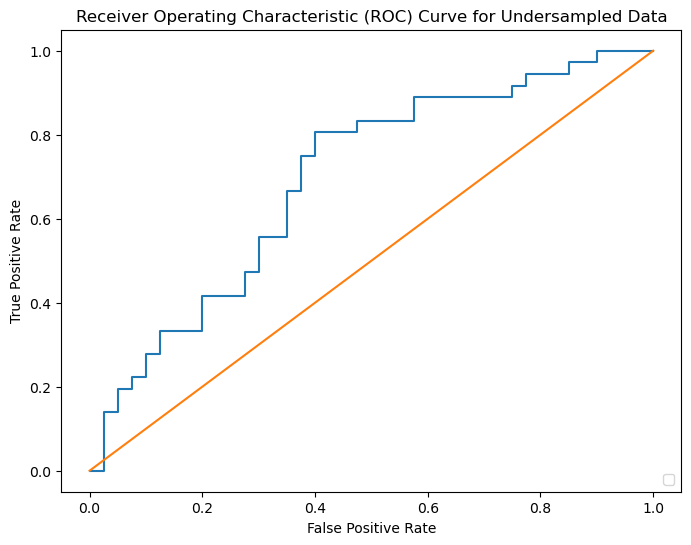

0.69375


In [158]:
fpr, tpr, thresholds = roc_curve(y_te, y_pr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Undersampled Data')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

In [159]:
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(x_tr, y_tr)

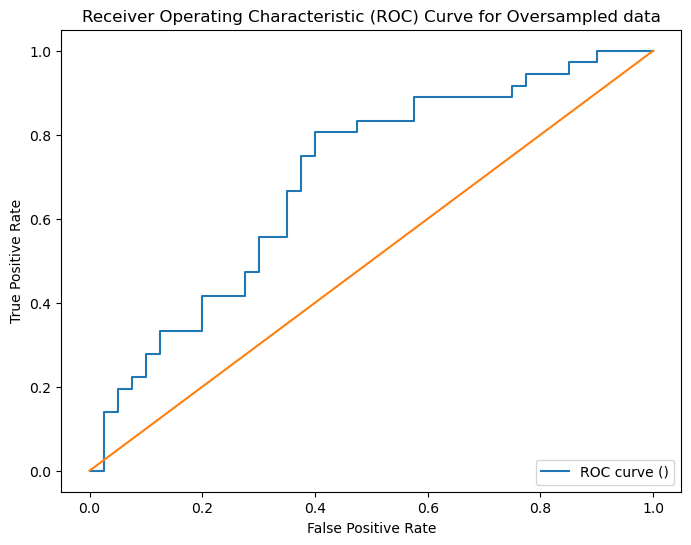

0.69375


In [160]:
fpr, tpr, thresholds = roc_curve(y_te, y_pr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve ()')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Oversampled data')
plt.legend(loc='lower right')
plt.show()


print(roc_auc)

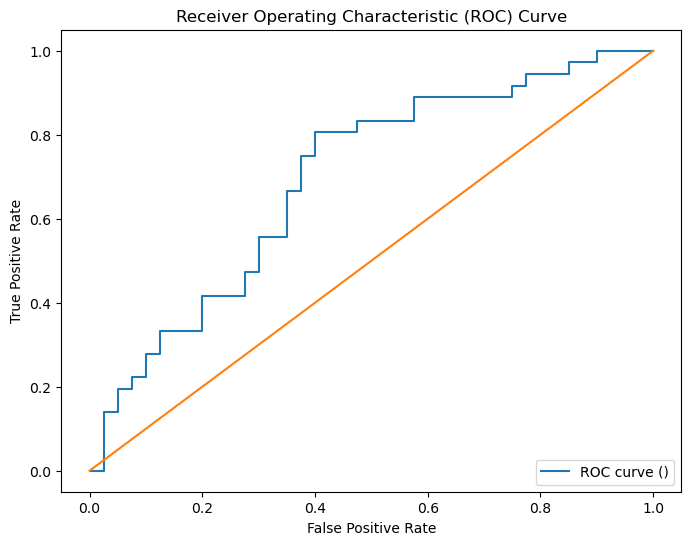

0.69375


In [161]:
fpr, tpr, thresholds = roc_curve(y_te, y_pr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve ()')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print(roc_auc)

Feature Importance On Reshaped Data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



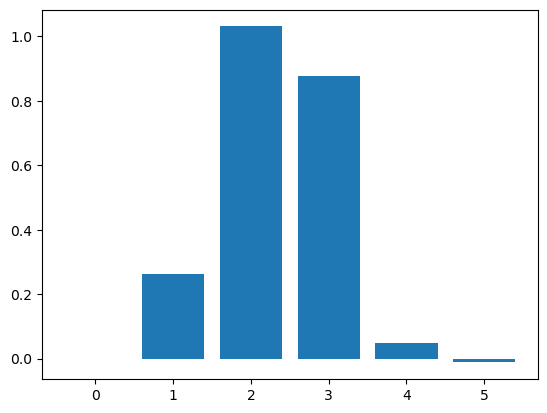

In [162]:
model = LogisticRegression()

model.fit(X_resampled, y_resampled)


importance = model.coef_[0]

plt.bar([x for x in range(len(importance))], importance)
plt.show()
    
